In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# for interactivity
import ipywidgets
from ipywidgets import interact


plt.rcParams ['figure.figsize'] = [20,8]

<h3> Data yang dipakai </h3>

In [11]:
pencemaran = os.listdir(r'Data_Pencemaran')
pencemaran

['SPU_Agu 2016.csv',
 'SPU_Agu 2017.csv',
 'SPU_Agu 2018.csv',
 'SPU_Apr 2016.csv',
 'SPU_Apr 2017.csv',
 'SPU_Apr 2018.csv',
 'SPU_Des 2016.csv',
 'SPU_Des 2017.csv',
 'SPU_Des 2018.csv',
 'SPU_Feb 2016.csv',
 'SPU_Feb 2017.csv',
 'SPU_Feb 2018.csv',
 'SPU_Jan 2016.csv',
 'SPU_Jan 2017.csv',
 'SPU_Jan 2018.csv',
 'SPU_Jul 2016.csv',
 'SPU_Jul 2017.csv',
 'SPU_Jul 2018.csv',
 'SPU_Jun 2016.csv',
 'SPU_Jun 2017.csv',
 'SPU_Jun 2018.csv',
 'SPU_Mar 2016.csv',
 'SPU_Mar 2017.csv',
 'SPU_Mar 2018.csv',
 'SPU_Mei 2016.csv',
 'SPU_Mei 2017.csv',
 'SPU_Mei 2018.csv',
 'SPU_Nov 2016.csv',
 'SPU_Nov 2017.csv',
 'SPU_Nov 2018.csv',
 'SPU_Okt 2016.csv',
 'SPU_Okt 2017.csv',
 'SPU_Okt 2018.csv',
 'SPU_Sep 2016.csv',
 'SPU_Sep 2017.csv',
 'SPU_Sep 2018.csv']

<h3> Konkatenasi dan Pengecekan Data </h3>

In [12]:
path = r'Data_Pencemaran'

#blank dataframe
final_pencemaran = pd.DataFrame()

for file in pencemaran :
    df = pd.read_csv(path+'/'+file, encoding='utf-8', index_col = 0, parse_dates = True)
    final_pencemaran = pd.concat([final_pencemaran, df])

In [13]:
final_pencemaran.shape

(1212, 9)

In [14]:
final_pencemaran.isnull().sum() 

pm10           109
so2            116
co             116
o3             109
no2            116
max            109
critical       116
categori       109
lokasi_spku    116
dtype: int64

In [15]:
final_pencemaran.index.isnull().sum()

116

In [16]:
#Hapus Tanggal
final_pencemaran = final_pencemaran.reset_index().dropna().set_index('tanggal')
final_pencemaran

,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
tanggal,,,,,,,,,
2016-08-01,73,29.0,45.0,100.0,11.0,100,O3,SEDANG,DKI3
2016-08-02,58,30.0,38.0,131.0,14.0,131,O3,TIDAK SEHAT,DKI2
2016-08-03,64,30.0,41.0,136.0,21.0,136,O3,TIDAK SEHAT,DKI5
2016-08-04,87,30.0,49.0,133.0,15.0,133,O3,TIDAK SEHAT,DKI2
2016-08-05,107,30.0,47.0,108.0,21.0,108,O3,TIDAK SEHAT,DKI3
...,...,...,...,...,...,...,...,...,...
2018-09-26,94,50.0,26.0,202.0,21.0,202,O3,SANGAT TIDAK SEHAT,DKI5
2018-09-27,72,37.0,21.0,146.0,18.0,146,O3,TIDAK SEHAT,DKI5
2018-09-28,70,33.0,22.0,194.0,17.0,194,O3,TIDAK SEHAT,DKI5


In [17]:
final_pencemaran.index.isnull().sum()

0

In [18]:
final_pencemaran.isnull().any() 

pm10           False
so2            False
co             False
o3             False
no2            False
max            False
critical       False
categori       False
lokasi_spku    False
dtype: bool

In [19]:
final_pencemaran = final_pencemaran.sort_index()
final_pencemaran.dtypes

pm10            object
so2            float64
co             float64
o3             float64
no2            float64
max             object
critical        object
categori        object
lokasi_spku     object
dtype: object

In [20]:
final_pencemaran.head()

,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
tanggal,,,,,,,,,
2016-01-01,72,32.0,53.0,51.0,11.0,72,PM10,SEDANG,DKI4
2016-01-02,52,32.0,29.0,50.0,12.0,52,PM10,SEDANG,DKI1
2016-01-03,44,33.0,33.0,50.0,18.0,50,O3,BAIK,DKI3
2016-01-04,61,33.0,36.0,103.0,24.0,103,O3,TIDAK SEHAT,DKI2
2016-01-05,99,33.0,54.0,67.0,22.0,99,PM10,SEDANG,DKI4


<h3> Ubah Data </h3>

In [21]:
final_pencemaran['pm10'] = pd.to_numeric(final_pencemaran['pm10'],errors = 'coerce')
final_pencemaran['so2'] = pd.to_numeric(final_pencemaran['so2'],errors = 'coerce')
final_pencemaran['co'] = pd.to_numeric(final_pencemaran['co'],errors = 'coerce')
final_pencemaran['o3'] = pd.to_numeric(final_pencemaran['o3'],errors = 'coerce')
final_pencemaran['no2'] = pd.to_numeric(final_pencemaran['no2'],errors = 'coerce')
final_pencemaran['max'] = pd.to_numeric(final_pencemaran['max'],errors = 'coerce')

In [22]:
final_pencemaran.dtypes

pm10           float64
so2            float64
co             float64
o3             float64
no2            float64
max            float64
critical        object
categori        object
lokasi_spku     object
dtype: object

In [23]:
print("---------------------------------------------")
print(final_pencemaran['categori'].value_counts())
print("---------------------------------------------")
print(final_pencemaran['lokasi_spku'].value_counts())
print("---------------------------------------------")
print(final_pencemaran['critical'].value_counts())
print("---------------------------------------------")

---------------------------------------------
SEDANG                598
TIDAK SEHAT           390
BAIK                   80
SANGAT TIDAK SEHAT     28
Name: categori, dtype: int64
---------------------------------------------
DKI5    354
DKI3    316
DKI2    261
DKI4    120
DKI1     45
Name: lokasi_spku, dtype: int64
---------------------------------------------
O3      894
PM10    148
SO2      39
CO       15
Name: critical, dtype: int64
---------------------------------------------


<h3> Statistik Data Secara Umum </h3>

In [24]:
print("Average Ratio of pm10: {0:.2f}".format(final_pencemaran['pm10'].mean()))
print("Average Ratio of so2 : {0:.2f}".format(final_pencemaran['so2'].mean()))
print("Average Ratio of co : {0:.2f}".format(final_pencemaran['co'].mean()))
print("Average o3: {0:.2f}".format(final_pencemaran['o3'].mean()))
print("Average no2: {0:.2f}".format(final_pencemaran['no2'].mean()))
print("Average max : {0:.2f}".format(final_pencemaran['max'].mean()))

Average Ratio of pm10: 61.62
Average Ratio of so2 : 35.19
Average Ratio of co : 34.59
Average o3: 95.19
Average no2: 15.40
Average max : 97.17


In [25]:
# lets check the Summary Statistics for each of the Crops

@interact
def summary(Tipe = list(final_pencemaran['categori'].value_counts().index)):
    x = final_pencemaran[final_pencemaran['categori'] == Tipe]
    print("---------------------------------------------")
    print("Statistics for pm10")
    print("Minimum  required :", x['pm10'].min())
    print("Average  required :", x['pm10'].mean())
    print("Maximum  required :", x['pm10'].max()) 
    print("---------------------------------------------")
    print("Statistics for so2")
    print("Minimum  required :", x['so2'].min())
    print("Average  required :", x['so2'].mean())
    print("Maximum  required :", x['so2'].max()) 
    print("---------------------------------------------")
    print("Statistics for co")
    print("Minimum  required :", x['co'].min())
    print("Average  required :", x['co'].mean())
    print("Maximum  required :", x['co'].max()) 
    print("---------------------------------------------")
    print("Statistics for o3")
    print("Minimum  required : {0:.2f}".format(x['o3'].min()))
    print("Average  required : {0:.2f}".format(x['o3'].mean()))
    print("Maximum  required : {0:.2f}".format(x['o3'].max()))
    print("---------------------------------------------")
    print("Statistics for no2")
    print("Minimum  required : {0:.2f}".format(x['no2'].min()))
    print("Average  required : {0:.2f}".format(x['no2'].mean()))
    print("Maximum  required : {0:.2f}".format(x['no2'].max()))
    print("---------------------------------------------")

interactive(children=(Dropdown(description='Tipe', options=('SEDANG', 'TIDAK SEHAT', 'BAIK', 'SANGAT TIDAK SEH…

<h3> Visualisasi Data Numerik dan Kategorik </h3>

In [26]:
data_numerik = final_pencemaran._get_numeric_data()
data_kategorik = final_pencemaran.drop(data_numerik.columns, axis = 1)

@interact
def lihatHistogramTunggal (nilai_x = list(data_kategorik.columns)) :
    
    plt.title('\n Grafik Klasifikasi {} Untuk Standar Pencemaran Udara DKI Jakarta'.format(str(nilai_x).title()))
    sns.countplot(x = nilai_x, data=data_kategorik)
    plt.ylabel('Banyaknya Hari')
    plt.xlabel(str(nilai_x).title())
    plt.show()

interactive(children=(Dropdown(description='nilai_x', options=('critical', 'categori', 'lokasi_spku'), value='…

In [27]:
@interact
def lihatHistogramJamak (nilai_x = list(data_kategorik.columns), nilai_hue = list(data_kategorik.columns)) :
    
    if (nilai_x == nilai_hue) :
        print("Komponen nilai_x tidak boleh sama dengan nilai_hue")
    
    else :
        plt.title('\n Grafik Klasifikasi {} Berdasarkan {} Untuk Standar Pencemaran Udara DKI Jakarta'.
                  format(str(nilai_x).title(),str(nilai_hue).title()))
        sns.countplot(x = nilai_x, data=data_kategorik, hue=nilai_hue)
        plt.ylabel('Banyaknya Hari')
        plt.xlabel(str(nilai_x).title())
        plt.show()

interactive(children=(Dropdown(description='nilai_x', options=('critical', 'categori', 'lokasi_spku'), value='…

In [28]:
banyak_partisi = [5,10,25,50,100]
garis_kde = [False, True]
@interact
def lihatHistogramData (data_x = list(data_numerik.columns), partisi = banyak_partisi, garis = garis_kde) :
    sns.distplot(data_numerik[data_x], kde=garis, bins=partisi);

interactive(children=(Dropdown(description='data_x', options=('pm10', 'so2', 'co', 'o3', 'no2', 'max'), value=…

In [29]:
@interact
def lihatDampakKomponen (Data = data_numerik.columns, Indikator = data_kategorik.columns) :
    sns.barplot(final_pencemaran[Data], final_pencemaran[Indikator])
    plt.ylabel(' ')
    plt.xlabel('no2', fontsize = 10)
    plt.yticks(fontsize = 10)

interactive(children=(Dropdown(description='Data', options=('pm10', 'so2', 'co', 'o3', 'no2', 'max'), value='p…

<h3> Visualisasi - Time Series </h3>

In [30]:
final_pencemaran

,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
tanggal,,,,,,,,,
2016-01-01,72.0,32.0,53.0,51.0,11.0,72.0,PM10,SEDANG,DKI4
2016-01-02,52.0,32.0,29.0,50.0,12.0,52.0,PM10,SEDANG,DKI1
2016-01-03,44.0,33.0,33.0,50.0,18.0,50.0,O3,BAIK,DKI3
2016-01-04,61.0,33.0,36.0,103.0,24.0,103.0,O3,TIDAK SEHAT,DKI2
2016-01-05,99.0,33.0,54.0,67.0,22.0,99.0,PM10,SEDANG,DKI4
...,...,...,...,...,...,...,...,...,...
2018-12-27,29.0,25.0,15.0,55.0,6.0,55.0,O3,SEDANG,DKI1
2018-12-28,33.0,24.0,7.0,63.0,3.0,63.0,O3,SEDANG,DKI1
2018-12-29,30.0,24.0,6.0,50.0,8.0,50.0,O3,BAIK,DKI3


In [31]:
final_pencemaran_ts = final_pencemaran.copy()
final_pencemaran_ts['Year']= final_pencemaran.index.year
final_pencemaran_ts['Month']= final_pencemaran.index.month
final_pencemaran_ts['Day Name']= final_pencemaran.index.day_name()

In [32]:
final_pencemaran_ts

,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,Year,Month,Day Name
tanggal,,,,,,,,,,,,
2016-01-01,72.0,32.0,53.0,51.0,11.0,72.0,PM10,SEDANG,DKI4,2016,1,Friday
2016-01-02,52.0,32.0,29.0,50.0,12.0,52.0,PM10,SEDANG,DKI1,2016,1,Saturday
2016-01-03,44.0,33.0,33.0,50.0,18.0,50.0,O3,BAIK,DKI3,2016,1,Sunday
2016-01-04,61.0,33.0,36.0,103.0,24.0,103.0,O3,TIDAK SEHAT,DKI2,2016,1,Monday
2016-01-05,99.0,33.0,54.0,67.0,22.0,99.0,PM10,SEDANG,DKI4,2016,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,29.0,25.0,15.0,55.0,6.0,55.0,O3,SEDANG,DKI1,2018,12,Thursday
2018-12-28,33.0,24.0,7.0,63.0,3.0,63.0,O3,SEDANG,DKI1,2018,12,Friday
2018-12-29,30.0,24.0,6.0,50.0,8.0,50.0,O3,BAIK,DKI3,2018,12,Saturday


In [33]:
final_pencemaran_perminggu= final_pencemaran_ts.resample('W').mean()
final_pencemaran_perbulan=final_pencemaran_ts.resample('M').mean()

In [34]:
final_pencemaran_perminggu.head()

,pm10,so2,co,o3,no2,max,Year,Month
tanggal,,,,,,,,
2016-01-03,56.000000,32.333333,38.333333,50.333333,13.666667,58.000000,2016.0,1.0
2016-01-10,75.714286,33.857143,38.000000,73.000000,15.571429,82.428571,2016.0,1.0
2016-01-17,72.571429,39.428571,37.428571,81.000000,15.857143,85.857143,2016.0,1.0
2016-01-24,69.857143,43.285714,40.857143,69.000000,16.285714,74.428571,2016.0,1.0
2016-01-31,67.285714,42.142857,35.000000,65.285714,15.285714,73.000000,2016.0,1.0


In [35]:
final_pencemaran_perbulan.head()

,pm10,so2,co,o3,no2,max,Year,Month
tanggal,,,,,,,,
2016-01-31,69.870968,38.967742,37.870968,69.967742,15.548387,76.903226,2016,1
2016-02-29,59.586207,33.517241,38.689655,64.137931,14.344828,68.448276,2016,2
2016-03-31,63.516129,25.870968,37.967742,88.419355,16.129032,90.354839,2016,3
2016-04-30,63.900000,27.600000,45.466667,83.700000,15.366667,85.233333,2016,4
2016-05-31,69.677419,29.129032,51.870968,86.741935,16.419355,90.935484,2016,5


In [36]:
temp_bln = np.array('2016-01', dtype=np.datetime64)
rentang_bulan = temp_bln + np.arange(36)

@interact
def lihatTimeSeries (start = rentang_bulan, end = rentang_bulan, Data = data_numerik.columns):
    
    if (start >= end) :
        print('Input Interval Waktu Tidak Valid')
    
    else :
        #plot
        fig, ax = plt.subplots(figsize=(20,8))
        plt.title('Pergerakan Data {} Setiap Minggu dan Bulan ({} - {})'.format(Data, start, end))
        ax.plot(final_pencemaran.loc[start:end, Data], marker='.',linestyle='-', label='Daily')
        ax.plot(final_pencemaran_perminggu.loc[start:end, Data], marker='o',linestyle='-',label='Avg Mingguan')
        ax.plot(final_pencemaran_perbulan.loc[start:end, Data], marker='*',linestyle='-',label='Avg Bulanan')

        ax.set_ylabel('Polusi dari komponen {}'.format(Data))
        ax.set_xlabel('Rentang Waktu')
        ax.legend()
        plt.show()

interactive(children=(Dropdown(description='start', options=(numpy.datetime64('2016-01'), numpy.datetime64('20…

In [37]:
Day = final_pencemaran_ts['Day Name'].unique()

@interact
def lihatTimeSeriesHari (Hari = Day, Data = data_numerik.columns, Tahun = final_pencemaran_ts['Year'].unique()):
    
    dt_temporary = final_pencemaran_ts.loc[final_pencemaran_ts['Day Name'] == Hari]
    
    #plot
    fig, ax = plt.subplots(figsize=(20,8))
    plt.title('Pergerakan Data {} Pada Hari {} Sepanjang Tahun {})'.format(Data, Hari, Tahun))
    
    ax.plot(dt_temporary.loc[:, Data], marker='.',linestyle='-', label='Daily')

    ax.set_ylabel('Polusi dari komponen {}'.format(Data))
    ax.set_xlabel('Rentang Waktu')
    ax.legend()
    plt.show()

interactive(children=(Dropdown(description='Hari', options=('Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday…

<h3> KNN </h3>

<h3> Resampling Data - (Manual) </h3>

In [46]:
temp_bln = np.array('2016-01', dtype=np.datetime64)
rentang_bulan = temp_bln + np.arange(36)

In [47]:
rentang_bulan

array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12'],
      dtype='datetime64[M]')

In [48]:
#Untuk menampung data hasil resampling
arr_result = []

In [49]:
for bulan in rentang_bulan :
    
    temp_dt = data_numerik[str(bulan)]
    arrDt = []
    
    for col in temp_dt.columns :
        
        counter = temp_dt[col].mean()
        arrDt.append(round(counter,0))
        
    arr_result.append(arrDt)

In [50]:
df_res_numerik = pd.DataFrame(arr_result, columns=data_numerik.columns)
df_res_numerik.head(len(df_res_numerik))

,pm10,so2,co,o3,no2,max
0,70.0,39.0,38.0,70.0,16.0,77.0
1,60.0,34.0,39.0,64.0,14.0,68.0
2,64.0,26.0,38.0,88.0,16.0,90.0
3,64.0,28.0,45.0,84.0,15.0,85.0
4,70.0,29.0,52.0,87.0,16.0,91.0
5,69.0,29.0,54.0,94.0,18.0,97.0
6,64.0,29.0,46.0,87.0,14.0,89.0
7,69.0,30.0,47.0,99.0,15.0,101.0
8,64.0,31.0,45.0,80.0,15.0,82.0
9,61.0,32.0,45.0,99.0,16.0,102.0


<h3> Visualisasi - Resampling Data </h3>

In [51]:
banyak_partisi = [5,10,25,50,100]
garis_kde = [False, True]
@interact
def lihatHistogramData (data_x = list(df_res_numerik.columns), partisi = banyak_partisi, garis = garis_kde) :
    sns.distplot(data_numerik[data_x], kde=garis, bins=partisi);

interactive(children=(Dropdown(description='data_x', options=('pm10', 'so2', 'co', 'o3', 'no2', 'max'), value=…

<h3> Prediksi Data - Data Resampling </h3>

In [52]:
#Buat Kolom Baru
df_res = df_res_numerik.copy()
df_res['categori'] = 'TBD'
df_res['lokasi_spku'] = 'TBD'

In [53]:
df_res.head()

,pm10,so2,co,o3,no2,max,categori,lokasi_spku
0,70.0,39.0,38.0,70.0,16.0,77.0,TBD,TBD
1,60.0,34.0,39.0,64.0,14.0,68.0,TBD,TBD
2,64.0,26.0,38.0,88.0,16.0,90.0,TBD,TBD
3,64.0,28.0,45.0,84.0,15.0,85.0,TBD,TBD
4,70.0,29.0,52.0,87.0,16.0,91.0,TBD,TBD


In [54]:
#Isi Nilai Kategori dan Lokasinya
j = 0

while (j < len(df_res)) :
    pred_a = model1.predict((np.array([df_res_numerik.iloc[j][:5].values])))
    pred_b = model.predict((np.array([df_res_numerik.iloc[j][:5].values])))
    
    df_res['categori'][j] = pred_a
    df_res['lokasi_spku'][j] = pred_b
    j = j + 1

<ipython-input-54-dc5af5b25c06>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['categori'][j] = pred_a
<ipython-input-54-dc5af5b25c06>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['lokasi_spku'][j] = pred_b
<ipython-input-54-dc5af5b25c06>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['categori'][j] = pred_a
<ipython-input-54-dc5af5b25c06>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [55]:
df_res.head(len(df_res))

,pm10,so2,co,o3,no2,max,categori,lokasi_spku
0,70.0,39.0,38.0,70.0,16.0,77.0,[DKI3],[SEDANG]
1,60.0,34.0,39.0,64.0,14.0,68.0,[DKI3],[SEDANG]
2,64.0,26.0,38.0,88.0,16.0,90.0,[DKI5],[SEDANG]
3,64.0,28.0,45.0,84.0,15.0,85.0,[DKI5],[SEDANG]
4,70.0,29.0,52.0,87.0,16.0,91.0,[DKI3],[SEDANG]
5,69.0,29.0,54.0,94.0,18.0,97.0,[DKI5],[SEDANG]
6,64.0,29.0,46.0,87.0,14.0,89.0,[DKI3],[SEDANG]
7,69.0,30.0,47.0,99.0,15.0,101.0,[DKI5],[TIDAK SEHAT]
8,64.0,31.0,45.0,80.0,15.0,82.0,[DKI3],[SEDANG]
9,61.0,32.0,45.0,99.0,16.0,102.0,[DKI5],[TIDAK SEHAT]


<h3> One Hot Encoding </h3>

In [56]:
final_pencemaran ['A'] = 0
final_pencemaran ['B'] = 0
final_pencemaran ['C'] = 0
final_pencemaran ['D'] = 0
final_pencemaran ['E'] = 0

In [57]:
final_pencemaran.head()

,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,A,B,C,D,E
tanggal,,,,,,,,,,,,,,
2016-01-01,72.0,32.0,53.0,51.0,11.0,72.0,PM10,SEDANG,DKI4,0,0,0,0,0
2016-01-02,52.0,32.0,29.0,50.0,12.0,52.0,PM10,SEDANG,DKI1,0,0,0,0,0
2016-01-03,44.0,33.0,33.0,50.0,18.0,50.0,O3,BAIK,DKI3,0,0,0,0,0
2016-01-04,61.0,33.0,36.0,103.0,24.0,103.0,O3,TIDAK SEHAT,DKI2,0,0,0,0,0
2016-01-05,99.0,33.0,54.0,67.0,22.0,99.0,PM10,SEDANG,DKI4,0,0,0,0,0


In [58]:
for i in final_pencemaran.index :
    final_pencemaran['A'][i] = (final_pencemaran['lokasi_spku'][i] == 'DKI1')
    final_pencemaran['B'][i] = (final_pencemaran['lokasi_spku'][i] == 'DKI2')
    final_pencemaran['C'][i] = (final_pencemaran['lokasi_spku'][i] == 'DKI3')   
    final_pencemaran['D'][i] = (final_pencemaran['lokasi_spku'][i] == 'DKI4')
    final_pencemaran['E'][i] = (final_pencemaran['lokasi_spku'][i] == 'DKI5')

<ipython-input-58-caa3d5d975e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_pencemaran['A'][i] = (final_pencemaran['lokasi_spku'][i] == 'DKI1')
C:\Users\Boy Cakaraningrat\anaconda3.1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-58-caa3d5d975e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_pencemaran['B'][i] = (

In [59]:
final_pencemaran['A'] = final_pencemaran['A'].replace([False, True],[0,1])
final_pencemaran['B'] = final_pencemaran['B'].replace([False, True],[0,1])
final_pencemaran['C'] = final_pencemaran['C'].replace([False, True],[0,1])
final_pencemaran['D'] = final_pencemaran['D'].replace([False, True],[0,1])
final_pencemaran['E'] = final_pencemaran['E'].replace([False, True],[0,1])

In [60]:
final_pencemaran

,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,A,B,C,D,E
tanggal,,,,,,,,,,,,,,
2016-01-01,72.0,32.0,53.0,51.0,11.0,72.0,PM10,SEDANG,DKI4,0,0,0,1,0
2016-01-02,52.0,32.0,29.0,50.0,12.0,52.0,PM10,SEDANG,DKI1,1,0,0,0,0
2016-01-03,44.0,33.0,33.0,50.0,18.0,50.0,O3,BAIK,DKI3,0,0,1,0,0
2016-01-04,61.0,33.0,36.0,103.0,24.0,103.0,O3,TIDAK SEHAT,DKI2,0,1,0,0,0
2016-01-05,99.0,33.0,54.0,67.0,22.0,99.0,PM10,SEDANG,DKI4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,29.0,25.0,15.0,55.0,6.0,55.0,O3,SEDANG,DKI1,1,0,0,0,0
2018-12-28,33.0,24.0,7.0,63.0,3.0,63.0,O3,SEDANG,DKI1,1,0,0,0,0
2018-12-29,30.0,24.0,6.0,50.0,8.0,50.0,O3,BAIK,DKI3,0,0,1,0,0


In [66]:
# lets split the Dataset for Predictive Modelling

y = final_pencemaran['categori']
x = final_pencemaran.drop(['categori','lokasi_spku','critical','max'],axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (1096, 10)
Shape of y: (1096,)


In [69]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (876, 10)
The Shape of x test: (220, 10)
The Shape of y train: (876,)
The Shape of y test: (220,)


In [70]:
#Membuat Predictive Model dengan LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\Boy Cakaraningrat\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


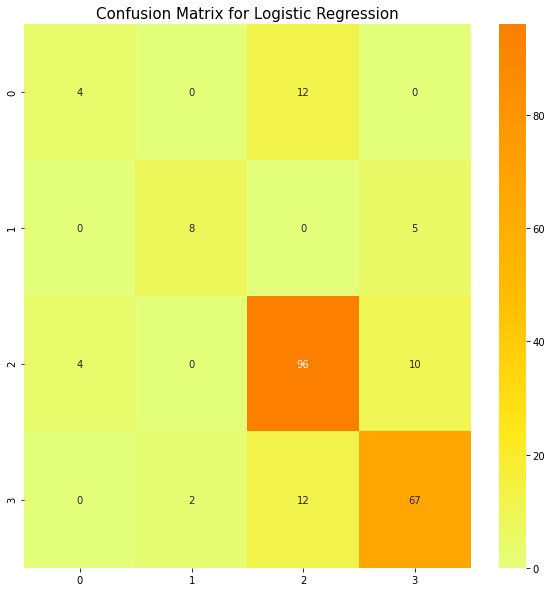

                    precision    recall  f1-score   support

              BAIK       0.50      0.25      0.33        16
SANGAT TIDAK SEHAT       0.80      0.62      0.70        13
            SEDANG       0.80      0.87      0.83       110
       TIDAK SEHAT       0.82      0.83      0.82        81

          accuracy                           0.80       220
         macro avg       0.73      0.64      0.67       220
      weighted avg       0.78      0.80      0.79       220



In [71]:
#Hasil dari Model Catagory di evaluasi.

# lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

# lets print the Classification Report also
cr = classification_report(y_test, y_pred)
print(cr)

In [72]:
final_pencemaran.head()

,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,A,B,C,D,E
tanggal,,,,,,,,,,,,,,
2016-01-01,72.0,32.0,53.0,51.0,11.0,72.0,PM10,SEDANG,DKI4,0,0,0,1,0
2016-01-02,52.0,32.0,29.0,50.0,12.0,52.0,PM10,SEDANG,DKI1,1,0,0,0,0
2016-01-03,44.0,33.0,33.0,50.0,18.0,50.0,O3,BAIK,DKI3,0,0,1,0,0
2016-01-04,61.0,33.0,36.0,103.0,24.0,103.0,O3,TIDAK SEHAT,DKI2,0,1,0,0,0
2016-01-05,99.0,33.0,54.0,67.0,22.0,99.0,PM10,SEDANG,DKI4,0,0,0,1,0


In [79]:
pm10 = float(input('Nilai pm10 : '))
so2 = float(input('Nilai so2 : '))
co = float(input('Nilai co : '))
o3 = float(input('Nilai o3 : '))
no2 = float(input('Nilai no2 : '))
lokasi_spku = str(input('Nilai lokasi : '))
if lokasi_spku == 'DKI1':
    lokasi_spku = [1,0,0,0,0]
elif lokasi_spku == 'DKI2':
    lokasi_spku = [0,1,0,0,0]
elif lokasi_spku == 'DKI3':
    lokasi_spku = [0,0,1,0,0]
elif lokasi_spku == 'DKI4':
    lokasi_spku = [0,0,0,1,0]
elif lokasi_spku == 'DKI5':
    lokasi_spku = [0,0,0,0,1]
else:
    lokasi_spku = [0,0,0,0,0]

Nilai pm10 : 72
Nilai so2 : 32
Nilai co : 53
Nilai o3 : 51
Nilai no2 : 11
Nilai lokasi : DKI4


In [81]:
prediction_a = model.predict((np.array([[pm10,so2,co,o3,no2]+lokasi_spku])))

print("The Suggested polution for Given Condition is :", prediction_a)

The Suggested polution for Given Condition is : ['SEDANG']
